# 🌳 Teoria: Erabaki zuhaitzak

**Erabaki zuhaitzak** edo *decision tree*, erabakiak hartzeko datuen balioen arabera, zuhaitz egitura sortzen duen ikasketa gainbegiratuko algoritmoa da.

In [ ]:
# hasierako importak
import pandas as pd
import matplotlib.pyplot as plt

## Teoria ulertzen

Teoria hobeto ulertzeko, adibide bat jorratzera goaz. Kasu honetan erabilitako datu-bilduma sintoma batzuk izanda (medikua ez naiz), gaixoak zein medizina hartu beharko luke adierazten du.

1. **Age**: Adina
2. **Sex**: Generoa
3. **BP**: Presio arteriala
4. **Cholesterol**: Kolesterola
5. **Na_to_K**: Sodiotik potasiora
6. **Drug**: medizina (*klasea*)

In [ ]:
df = pd.read_csv('datuak/drug200.csv')
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


Datuak normalean zenbakiak izaten ohi dira, beraz, saia gaitezen:

> **Testu** datuak $\rightarrow$ **Zenbakira** pasatzen

In [ ]:
from sklearn import preprocessing

# testu formatua duten datuek zenbakira pasatu
le = preprocessing.LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])
df['BP'] = le.fit_transform(df['BP'])
df['Cholesterol'] = le.fit_transform(df['Cholesterol'])

In [ ]:
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,0,0,25.355,drugY
1,47,1,1,0,13.093,drugC
2,47,1,1,0,10.114,drugC
3,28,0,2,0,7.798,drugX
4,61,0,1,0,18.043,drugY


Klasea ($y$) eta datuak ($X$) beti banandu behar dira.

In [ ]:
y = df['Drug']
df.drop(columns=['Drug'],inplace=True)

In [ ]:
from sklearn import tree
from sklearn.tree._export import plot_tree

clf = tree.DecisionTreeClassifier(random_state=2)
clf = clf.fit(df, y)

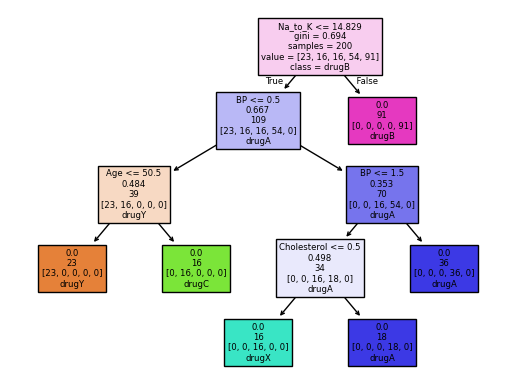

In [ ]:
plot_tree(clf,filled=True, impurity=True,
               label='root',
               class_names=y.unique(),
               feature_names=df.columns,
            )

plt.savefig('decision_tree.pdf',format='pdf')

In [ ]:
# 68,M,HIGH,HIGH,11.009
lista = [[78, 1, 0, 0, 14.009]]
df_test = pd.DataFrame(lista, columns=df.columns)

clf.predict(df_test)

array([[0., 1., 0., 0., 0.]])

### Zer da *Gini ezpurutasuna*

Nodo bat "purua" da bere elementu guztiak klase berekoak direnean, eta horrek Giniren indize 0.0 balioa duenean deritzo. Horrek esan nahi du, ez dela beharrezkoa gehiago zatitzea.